# Solutions to Sample Midterm C


### Learning Objective:

- Create Python code to automate a given task.

### Instructions:

The midterm tests your mastery of skills taught in Weeks 1-5, which culminates in creating simulation models using Python and algorithmic thinking. There are three questions, worth a total of 24 points. The exam is 80 minutes, and is open notes but closed computer. You can bring paper notes or books of any kind, but no computers, tablets, or cell phones are allowed. Before the exam is graded, do not share the questions or your solutions with anyone else, including students of other sections. When you turn in the exam, you must also hand in all scrap paper that you wrote on. Do not use a cell phone, tablet or computer in the classroom before all of the exams are handed in. **Any violation of academic integrity will result in a zero grade for the midterm for everyone involved.**

As long as you fulfill all the specifications described in the problem description, it doesn't matter how you solve the problem or how efficient is your code. However, if you cannot solve a problem, you may get partial credits for submitting whatever you have, including any parts of the four steps of algorithmic thinking.

## Q1. Simulating Demand under Price Promotions (7 points)

Suppose that a grocery store offers promotions on a certain product with probability $0.3$ every month, independent from other months. Conditional on whether there is a promotion in a month and on the promotion pattern of previous months, the monthly demand for the product is independently and normally distributed with the following parameters. (Assume that demand can take any decimal number and ignore the issue of negative demand.)

| Month | Mean ($\mu$) | Standard Deviation ($\sigma$) |
|--|--|--|
| No promotion | 500 | 100 |
| Promotion | 800 + 100$t$ | 150 |

In the above table, $t$ is the number of months without a promotion since the last promotion. For example, if last month had a promotion, then $t=0$. If the neither of the last two months had a promotion but the month before had one, then $t=2$.

**Write a function called "simulateDemand" with one input argument:**

- **n**: the number of months to simulate. (Assume this is at least 1).

**The function should return a list of $n$ numbers corresponding to $n$ consecutive months of simulated demand for the product.** Assume that just prior to the months in the simualtion, there was a promotion, so $t=0$ in the beginning. 

In [1]:
# Sample solution
from numpy.random import default_rng
def simulateDemand(n):
    rng=default_rng()
    t=0
    demand=[]
    for i in range(n):
        decision=rng.choice(['Promote','NoPromote'],p=[0.3,0.7])
        if decision=='Promote':
            demand.append(rng.normal(800+100*t,150))
            t=0
        else:
            demand.append(rng.normal(500,100))
            t+=1
    return demand

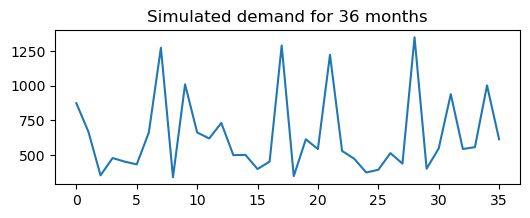

In [2]:
# Test code (Your graph probably looks different because of randomness)
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(simulateDemand(36))\
    .plot(title='Simulated demand for 36 months',figsize=(6,2))
plt.show()

# Q2: Inventory Management with Perishable Items (8 points)

Suppose that a certain store replenishes its supply of a perishable food item as follows. There is a certain "basestock" level $z$. At the end of every month, if the remaining inventory is $x$, and $x<z$, then the store orders exactly $z-x$ units, which will arrive at the beginning of the next month prior to store opening. However, every unit of the replenished item expires in 2 months, so that any supply that arrives at the beginning of month $t$ will need to be discarded at the beginning of month $t+2$ if it is not sold in months $t$ or $t+1$. Assume that the store always sells units with the earliest expiration date first. Moreover, assume that in month 0, the initial inventory is equal to the basestock level of $z$. 

**Write a function called "simulateSupply" with 2 input parameters:** 

- **demand**: a non-empty list of non-negative integers, with each element corresponding to the customer demand for the food item in the corresponding month. 
- **z**: the basestock level.

**The function should return (not print) two numbers:**

- **totalLost**: the total amount of customer demand that was not fulfilled in all the $n$ months corresponding to the data, where `n=len(demand)`. (Since month number starts from 0, the $n$ months are numbered $0, 1, 2, \cdots n-1$.)

- **totalDiscarded**: the total number of units that were discarded at the beginning of the the $n$ months.

For example, after writing your function, the code
```python
totalLost,totalDiscarded=simulateSupply([30,40,20,100,120],100)
```
should set the variable "totalLost" to 30 and "totalDiscarded" to 40. The following table illustrates the inventory dynamics.

| Month | Discarded | Beginning Inventory | Demand | Fulfilled | Lost Sales | End Inventory | Units Ordered |
|--|--|--|--|--|--|--|--|
| 0 |0 | 100 | 30 | 30 | 0 | 70 | 30 |
| 1 |0 | 100 | 40 | 40 | 0 | 60 | 40 |
| 2 |30 | 70 | 20 | 20 |0 | 50 | 50 |
| 3 |10 | 90 | 100 | 90 | 10 | 0 | 100 |
| 4 | 0 | 100| 120 | 100 | 20 | 0 | 100 |
|**Total**| **40** | - | - |- | **30** | - |- |

**Optional Hint: the inventory dynamics always follow the following patterns:** 

-  For months 0 and 1, the beginning inventory is always equal to $z$ because nothing has expired yet. In the above example, $z=100$.
-  **Starting from month 2, the beginning inventory (after discarding expired items) is always equal to the minimum of $z$ and the total number of units ordered in the previous two months.** (To see why this makes sense, note that only the inventory freshly ordered in the previous two months will be still good for this month, and that the beginning inventory will never exceed $z$. Hence, the beginning inventory is never more than the minimum of $z$ and total orders from previous two months. Further analysis shows that it can never be less that this value.)
- In each month, the units discarded is always $z$ minus the beginning inventory.

In [3]:
# Final code
def simulateSupply(demand,z):
    ordered=[]
    month=0
    totalLost=0
    totalDiscarded=0
    for curDemand in demand:
        if month<2:
            beginInv=z
        else:
            beginInv=min(z,ordered[month-1]+ordered[month-2])
        totalDiscarded+=z-beginInv
        fulfilled=min(curDemand,beginInv)
        totalLost+=curDemand-fulfilled
        endInv=beginInv-fulfilled
        ordered.append(z-endInv)
        month+=1
    return totalLost,totalDiscarded

In [4]:
# Sample run
totalLost,totalDiscarded=simulateSupply([30,40,20,100,120],100)
print(f'totalLost={totalLost} totalDiscarded={totalDiscarded}')

totalLost=30 totalDiscarded=40


# Q3: Simulating Severity of Symptoms (9 points)

This question asks you to simulate the distribution of symptoms for patients at a given hospital infected with a certain virus.

Suppose that for each new patient who arrives at a hospital with the virus, the future severities of the patient's symptoms are independently drawn according to the following distribution: with probability $0.8$, the patient has Non-Critical symptoms for two weeks, then is discharged from the hospital; with probability $0.15$, the patient is Non-Critical for one week, then Critical for one week, then Non-Critical for the last week, and then discharged; with probability $0.05$, the patient is Critical for two weeks, then Non-Critical for two weeks, and then discharged.

For example, a patient who arrives in Week 0 may be Non-Critical in Week 0 and Week 1, and discharged at the end of Week 1. Another possibility is that the patient is Non-Critical in Week 0, Critical in Week 1, and Non-Critical in Week 2, and discharged at the end of Week 2. The final possibility is that the patient is Critical in Week 0 and 1, and Non-Critical in Week 2 and 3, and discharged at the end of Week 3.

**Write a function called "simulateSymptoms" with two input parameters:**

- **arrivalsList**: a list corresponding to the number of new patients who arrive at the hospital each week with the virus. Each number in the list is a non-negative integer. 
- **weeks**: a positive integer corresponding to the number of weeks to simulate. You may assume that this number is greater than or equal to the length of the arrivalsList. When it is strictly greater than the length of the arrivalsList, then assume that there are no more arrivals in the weeks that are not contained in the arrivalsList.

The function should return two lists, each of length equal to the input parameter "weeks":

- **critical**: a list corresponding to the number of patients exhibiting Critical symptoms in each week. 
- **nonCritical**: a list corresponding to the number of patients exhibiting Non-Critical symptoms each week.


In [5]:
# Write your code below
from numpy.random import default_rng
def simulateSymptoms(arrivalsList,weeks):
    rng=default_rng()
    critical=[0 for i in range(weeks+3)]
    nonCritical=[0 for i in range(weeks+3)]
    w=0
    for arrivals in arrivalsList:
        for i in range(arrivals):
            severity=rng.choice(['mild','developing','acute'],p=[0.8,0.15,0.05])
            if severity=='mild':
                nonCritical[w]+=1
                nonCritical[w+1]+=1
            elif severity=='developing':
                nonCritical[w]+=1
                critical[w+1]+=1
                nonCritical[w+2]+=1
            else:
                critical[w]+=1
                critical[w+1]+=1
                nonCritical[w+2]+=1
                nonCritical[w+3]+=1  
        w+=1
    return critical[:weeks],nonCritical[:weeks]

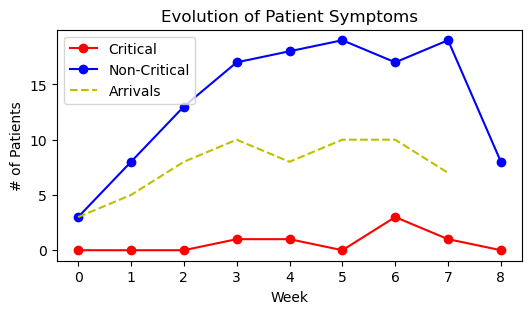

In [6]:
# Sample run
arrivalsList=[3,5,8,10,8,10,10,7]
weeks=9
critical,nonCritical=simulateSymptoms(arrivalsList,weeks)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(range(weeks),critical,'ro-',label='Critical')
plt.plot(range(weeks),nonCritical,'bo-',label='Non-Critical')
plt.plot(range(len(arrivalsList)),arrivalsList,'y--',label='Arrivals')
plt.legend()
plt.title('Evolution of Patient Symptoms')
plt.ylabel('# of Patients')
plt.xlabel("Week")
plt.show()